<a href="https://colab.research.google.com/github/teoad95/Deep-learning-Cryptocurrency-price-prediction/blob/main/BTC_price_prediction_with_social_media_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [238]:
# get market info for bitcoin from the start of 2016 to the current day

social_media_info = pd.read_csv('cryptodata_social_cryptocompare.csv')
social_media_info.index

RangeIndex(start=0, stop=2001, step=1)

In [239]:
market_info = pd.read_csv('BTC-USD.csv')
market_info.index

RangeIndex(start=0, stop=2434, step=1)

In [240]:
# first 567 contains zeros
social_media_info = social_media_info[567:2001:1]

In [241]:
social_media_info = social_media_info.dropna(how='any',axis=0) 
social_media_info['time'] = pd.to_datetime(social_media_info['time'])
social_media_info = social_media_info.sort_values(by='time')

In [242]:
market_info = market_info.dropna(how='any',axis=0)
market_info['Date'] = pd.to_datetime(market_info['Date'])
market_info = market_info.sort_values(by='Date')

In [243]:
# social media first row's date is 2017-05-26, and last row's date is 2021-04-28
market_info = market_info[(market_info['Date'] >= '2017-05-26') & (market_info['Date'] <= '2021-04-28')]

In [244]:
# join 2 datasets into 1 over Date field
market_info = market_info[market_info['Date'].notnull() == True].set_index('Date')
social_media_info = social_media_info[social_media_info['time'].notnull() == True].set_index('time')
dataset = market_info.join(social_media_info, how='right')

In [245]:
dataset = dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')]

In [246]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = pd.DataFrame(scaler.fit_transform(dataset), columns= dataset.columns)

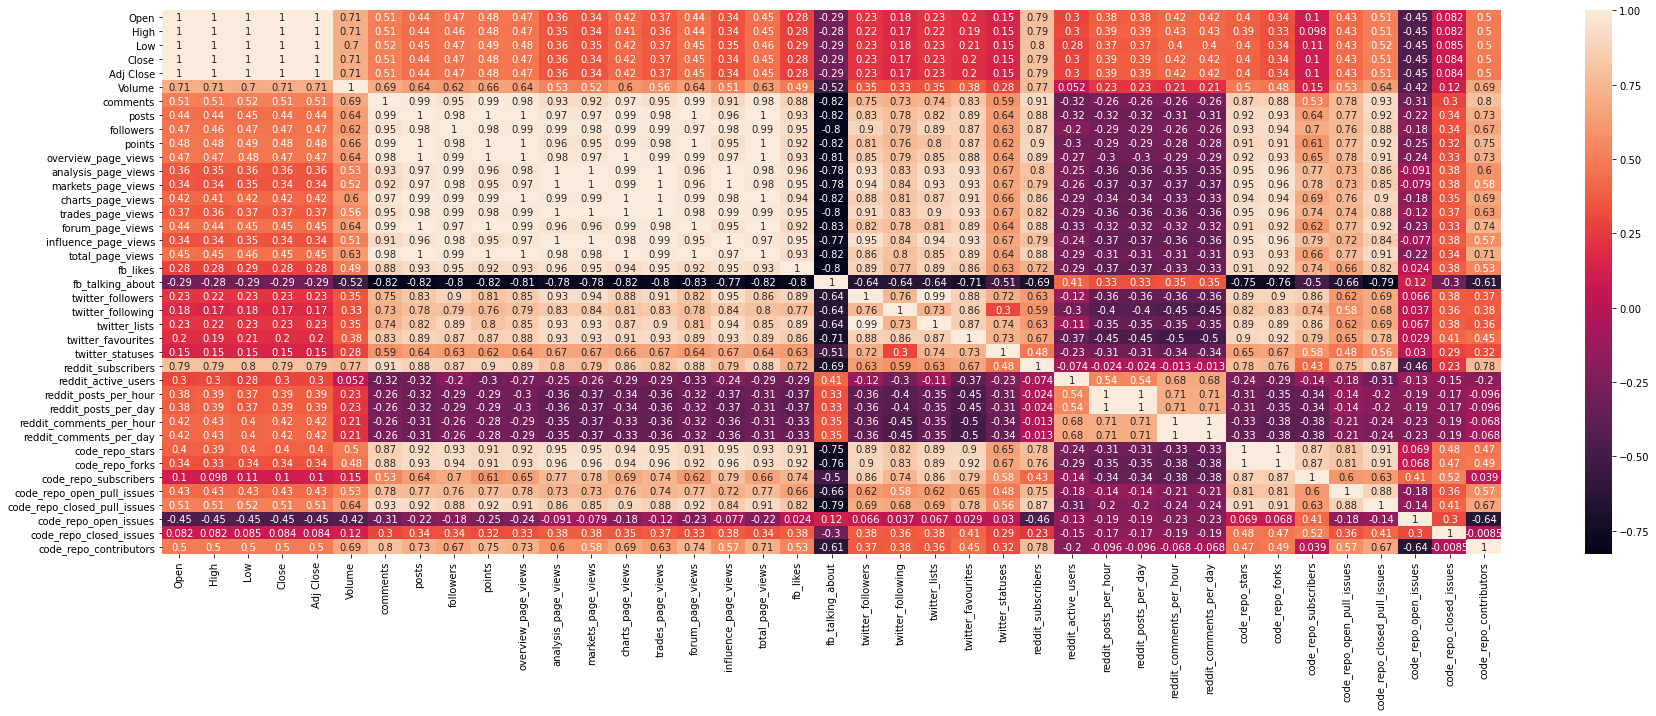

In [223]:
corrMatrix = scaled.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [247]:
columns_to_use = ['Close', 'Volume', 'comments', 'fb_likes', 'fb_talking_about', 'twitter_followers', 'reddit_comments_per_day', 'code_repo_stars', 'code_repo_open_issues']

In [248]:
dataset = dataset[columns_to_use]

In [229]:
dataset.head()

,Close,Volume,comments,fb_likes,fb_talking_about,twitter_followers,reddit_comments_per_day,code_repo_stars,code_repo_open_issues
time,,,,,,,,,
2017-05-26,2202.419922,1.763480e+09,5634,31479,597,194066,8437.50,15817,686
2017-05-27,2038.869995,1.700480e+09,5827,31505,565,195011,4130.02,15853,688
2017-05-28,2155.800049,1.147140e+09,5873,31539,533,195817,3314.15,15876,685
2017-05-29,2255.610107,9.946250e+08,5896,31560,453,196623,6428.57,15904,686
2017-05-30,2175.469971,1.443970e+09,5958,31582,359,197387,6676.97,15932,686


In [249]:
window_size = 15

In [250]:
dataset['NewColumn'] = dataset['Close'] - dataset['Close'].shift(window_size - 1)
dataset.insert(0, 'Y', dataset['NewColumn'] > 0)
dataset = dataset.drop(['NewColumn'], axis=1)

In [259]:
dataset.head(16)

,Y,Close,Volume,comments,fb_likes,fb_talking_about,twitter_followers,reddit_comments_per_day,code_repo_stars,code_repo_open_issues
time,,,,,,,,,,
2017-05-26,False,2202.419922,1.763480e+09,5634,31479,597,194066,8437.50,15817,686
2017-05-27,False,2038.869995,1.700480e+09,5827,31505,565,195011,4130.02,15853,688
2017-05-28,False,2155.800049,1.147140e+09,5873,31539,533,195817,3314.15,15876,685
2017-05-29,False,2255.610107,9.946250e+08,5896,31560,453,196623,6428.57,15904,686
2017-05-30,False,2175.469971,1.443970e+09,5958,31582,359,197387,6676.97,15932,686
2017-05-31,False,2286.409912,1.544830e+09,5984,31612,312,198260,4361.43,15972,688
2017-06-01,False,2407.879883,1.653180e+09,6011,31629,252,199074,4749.86,16012,690
2017-06-02,False,2488.550049,1.317030e+09,6052,31653,220,199817,3562.89,16054,691
2017-06-03,False,2515.350098,1.514950e+09,6096,31685,243,200498,3754.89,16084,691


In [260]:
split_date = '2020-04-01'

In [261]:
training_set, test_set = dataset[dataset.index <split_date], dataset[dataset.index >= split_date]

In [262]:
training_set_to_predict_value = training_set['Y'].reset_index(drop=True)
training_set = training_set.drop(['Y'], axis=1)

In [263]:
training_set = scaler.fit_transform(training_set)
test_set = scaler.fit_transform(test_set)

In [264]:
x_train = []
y_train = []

In [265]:
for i in range(window_size, training_set.shape[0]):
    x_train.append(training_set[i-window_size:i])
    y_train.append(float(training_set_to_predict_value[i]))

In [266]:
y_train

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [267]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [269]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model():
    model = Sequential()

    model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
    model.add(Dropout(0.3))
    model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
    model.add(Dropout(0.4))
    model.add(LSTM(units = 120, activation = 'relu', return_sequences = True))
    model.add(Dropout(0.5))
    model.add(Dense(units=1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [270]:
model = build_model()
history = model.fit(x_train, y_train, epochs = 50, batch_size = 64, validation_split = 0.1)

Epoch 1/50
15/15 [==============================] - 8s 168ms/step - loss: 0.6933 - val_loss: 0.6925
Epoch 2/50
15/15 [==============================] - 1s 57ms/step - loss: 0.6931 - val_loss: 0.6932
Epoch 3/50
15/15 [==============================] - 1s 61ms/step - loss: 0.6915 - val_loss: 0.6956
Epoch 4/50
15/15 [==============================] - 1s 60ms/step - loss: 0.6790 - val_loss: 0.6822
Epoch 5/50
15/15 [==============================] - 1s 56ms/step - loss: 0.6588 - val_loss: 0.6810
Epoch 6/50
15/15 [==============================] - 1s 60ms/step - loss: 0.6540 - val_loss: 0.6633
Epoch 7/50
15/15 [==============================] - 1s 57ms/step - loss: 0.6268 - val_loss: 0.6741
Epoch 8/50
15/15 [==============================] - 1s 67ms/step - loss: 0.6278 - val_loss: 0.7389
Epoch 9/50
15/15 [==============================] - 1s 61ms/step - loss: 0.6180 - val_loss: 0.6571
Epoch 10/50
15/15 [==============================] - 1s 59ms/step - loss: 0.6262 - val_loss: 0.6387
Epoch 11

In [155]:
x_train.shape

(1026, 15, 9)

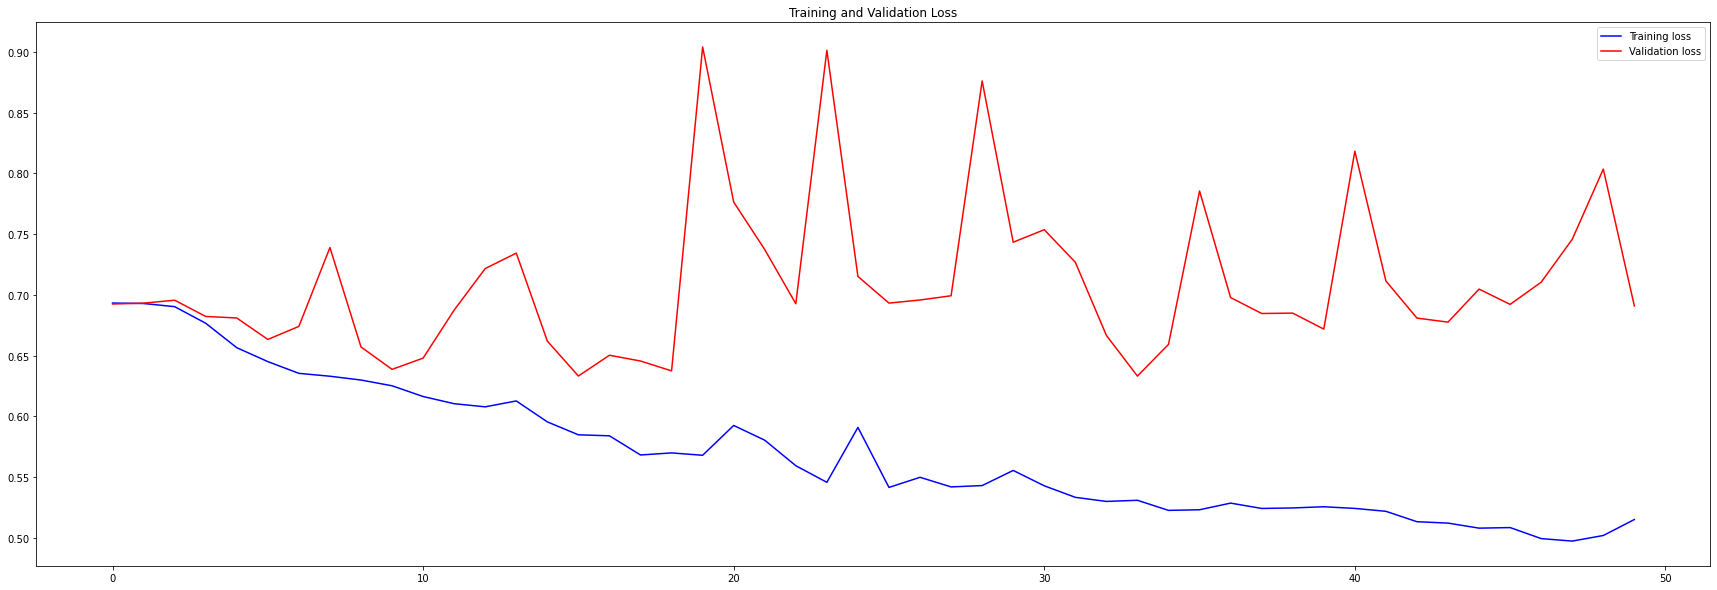

In [271]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=(30,10))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()